In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [48]:
def chi2(y_exp, y_err, y_true):
    return {'chi2': sum(((y_true - y_exp) / y_err) ** 2), 'chi2_max': len(y_exp) + (8 * len(y_exp)) ** 0.5}

In [6]:
A = pd.read_csv('data/A.csv', comment='#')
print(A.T.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &     0 &     1 &     2 &     3 &     4 \\
\midrule
z1 &  34.1 &  33.8 &  33.5 &  33.3 &  33.1 \\
z2 &  35.1 &  33.7 &  33.3 &  33.2 &  33.0 \\
n  &   1.0 &   2.0 &   3.0 &   4.0 &   5.0 \\
\bottomrule
\end{tabular}



C:\Users\timbe\AppData\Local\Temp\ipykernel_23960\2569333963.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(A.T.to_latex())


In [30]:
A['n'] += 1
A['z'] = (A['z1'] + A['z2']) / 2
A['sz2'] = ((A['z1'] ** 2 + A['z2'] ** 2) / 2 - A['z'] ** 2)
A['sz2'] ** 0.5

0    0.50
1    0.05
2    0.10
3    0.05
4    0.05
Name: sz2, dtype: float64

In [49]:
linear = lambda x, a, b: a * x + b

popt, pcov = curve_fit(linear, 1 / A['n'], A['z'], sigma=(A['sz2'] + 0.05 ** 2) ** 0.5)
chi2(A['z'], A['sz2'] ** 0.5, linear(1 / A['n'], *popt)), (np.diag(pcov) ** 0.5)

({'chi2': 0.9959983753330828, 'chi2_max': 11.32455532033676},
 array([0.23267287, 0.05749783]))

C:\Users\timbe\AppData\Local\Temp\ipykernel_23960\2785327481.py:13: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  r'$+$' * (popt[1] > 0) + r'$-$' * (popt[1] < 0)) + f'{popt[1]:.2f}')


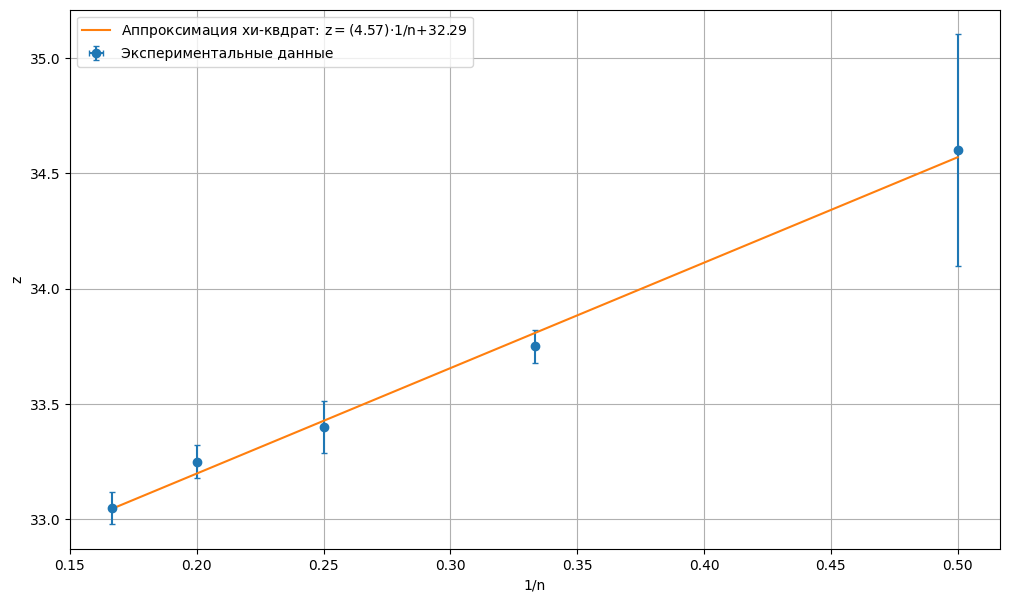

In [35]:
grid = np.linspace(1 / A['n'].min(), 1 / A['n'].max())

x_label = '1/n'
y_label = 'z'

plt.figure(figsize=(12, 7))
plt.grid()
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.errorbar(1 / A['n'], A['z'], (A['sz2'] + 0.05 ** 2) ** 0.5, 0, 'o', capsize=2, label='Экспериментальные данные')
plt.plot(grid, linear(grid, *popt),
         label=f'Аппроксимация хи-квдрат: {y_label}' + r'$=$' + f'({popt[0]:.2f})' + r'$\cdot$' + f'{x_label}' + (
                 r'$+$' * (popt[1] > 0) + r'$-$' * (popt[1] < 0)) + f'{abs(popt[1]):.2f}')
plt.legend()

In [45]:
B = pd.read_csv('data/B.csv', comment='#')
print(B.T.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &     0 &     1 &     2 &     3 &     4 &     5 &     6 &     7 \\
\midrule
n  &  1.00 &  2.00 &  3.00 &  4.00 & -1.00 & -2.00 & -3.00 & -4.00 \\
xn &  0.16 &  0.34 &  0.46 &  0.64 & -0.14 & -0.34 & -0.50 & -0.68 \\
sx &  0.04 &  0.06 &  0.04 &  0.06 &  0.04 &  0.06 &  0.08 &  0.06 \\
\bottomrule
\end{tabular}



C:\Users\timbe\AppData\Local\Temp\ipykernel_23960\1131269674.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(B.T.to_latex())


In [52]:
linear = lambda x, a, b: a * x + b

popt, pcov = curve_fit(linear, B['n'], B['xn'], sigma=B['sx'])
chi2(B['xn'], B['sx'] ** 0.5, linear(B['n'], *popt)), (np.diag(pcov) ** 0.5)

({'chi2': 0.05257079096758466, 'chi2_max': 16.0},
 array([0.00313817, 0.00779584]))

C:\Users\timbe\AppData\Local\Temp\ipykernel_23960\975668230.py:13: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  r'$+$' * (popt[1] > 0) + r'$-$' * (popt[1] < 0)) + f'{abs(popt[1]):.2f}')


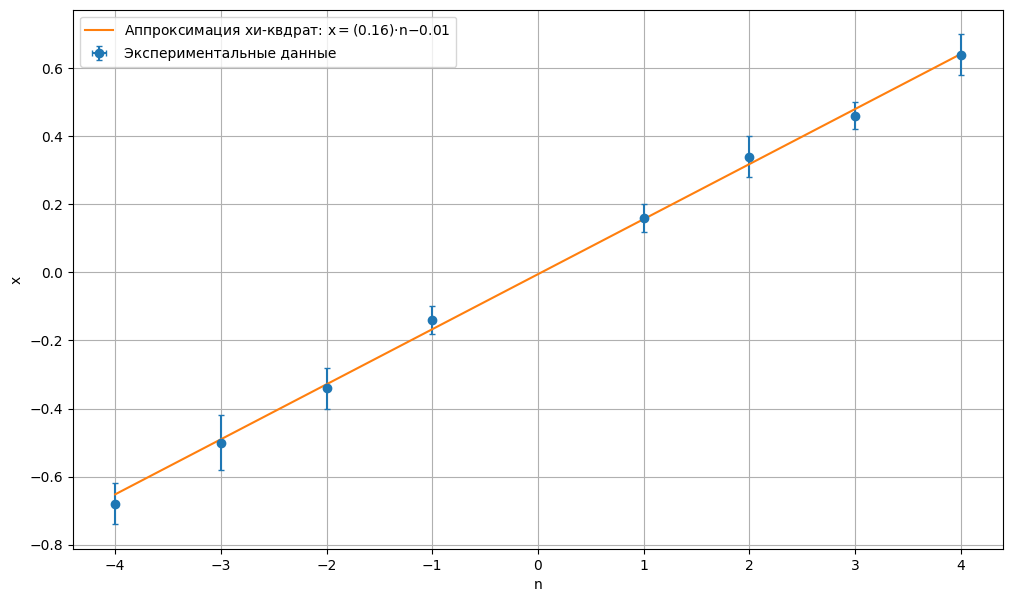

In [53]:
grid = np.linspace(B['n'].min(), B['n'].max())

x_label = 'n'
y_label = 'x'

plt.figure(figsize=(12, 7))
plt.grid()
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.errorbar(B['n'], B['xn'], B['sx'], 0, 'o', capsize=2, label='Экспериментальные данные')
plt.plot(grid, linear(grid, *popt),
         label=f'Аппроксимация хи-квдрат: {y_label}' + r'$=$' + f'({popt[0]:.2f})' + r'$\cdot$' + f'{x_label}' + (
                 r'$+$' * (popt[1] > 0) + r'$-$' * (popt[1] < 0)) + f'{abs(popt[1]):.2f}')
plt.legend()